                                            DBSCAN Clustering in ML - Density based clustering 

## DBSCAN Clustering in ML - Density based clustering

DBSCAN is a density-based clustering algorithm that groups data points that are closely packed together and marks outliers as noise based on their density in the feature space. It identifies clusters as dense regions in the data space separated by areas of lower density. Unlike K-Means or hierarchical clustering which assumes clusters are compact and spherical, DBSCAN perform well in handling real-world data irregularities such as:

* Arbitrary-Shaped Clusters: Clusters can take any shape not just circular or convex.
* Noise and Outliers: It effectively identifies and handles noise points without assigning them to any cluster.

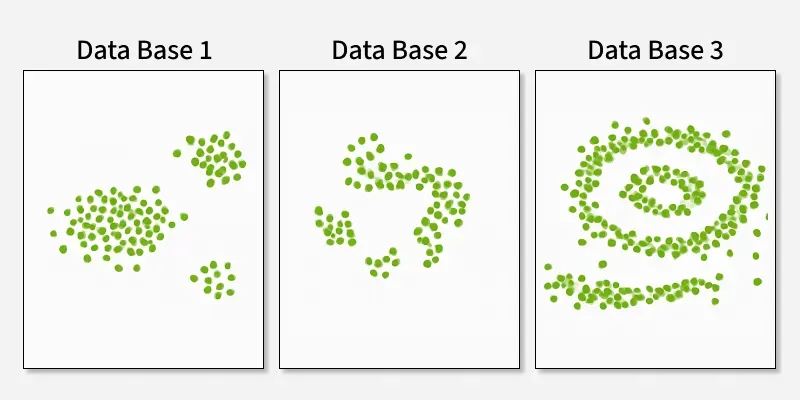

The figure above shows a data set with clustering algorithms: K-Means and Hierarchical handling compact, spherical clusters with varying noise tolerance while DBSCAN manages arbitrary-shaped clusters and noise handling.

## Key Parameters in DBSCAN

1. **eps (epsilon)**: The maximum distance between two samples for them to be considered as in the same neighborhood. A smaller eps value will result in more clusters and more noise, while a larger eps value may merge distinct clusters together.

* If eps is too small most points will be classified as noise.
* If eps is too large clusters may merge and the algorithm may fail to distinguish between them.

2. **min_samples**: The minimum number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. A higher min_samples value will require more points to form a cluster, which can lead to fewer clusters and more noise.

* If min_samples is too low, the algorithm may create many small clusters.
* If min_samples is too high, it may fail to identify clusters and classify many points as noise.

3. **metric**: The distance metric to use for calculating the distance between points. Common choices include 'euclidean', 'manhattan', and 'cosine'. The choice of metric can affect the shape and size of the clusters formed.
* Euclidean distance is suitable for continuous data and assumes clusters are spherical.
* Manhattan distance can be more appropriate for high-dimensional data or when clusters are elongated.
* Cosine distance is useful for text data or when the magnitude of the vectors is not important.

## How Does DBSCAN Work? 

DBSCAN works by categorizing data points into three types:

* Core points which have a sufficient number of neighbors within a specified radius (eplison)
* Border points which are near core points but lack enough neighbors to be core points themselves
* Noise points which do not belong to any cluster.

By iteratively expanding clusters from core points and connecting density-reachable points, DBSCAN forms clusters without relying on rigid assumptions about their shape or size.

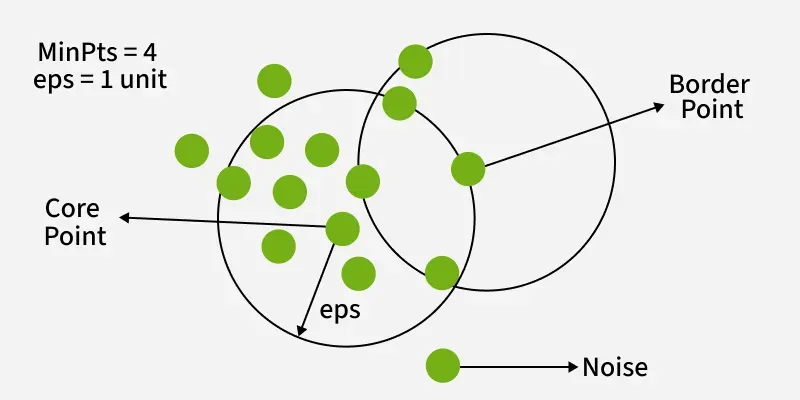

### Steps in the DBSCAN Algorithm

* **Identify Core Points:** For each point in the dataset count the number of points within its eps neighborhood. If the count meets or exceeds MinPts mark the point as a core point.
* **Form Clusters:** For each core point that is not already assigned to a cluster create a new cluster. Recursively find all density-connected points i.e points within the eps radius of the core point and add them to the cluster.
* **Density Connectivity:** Two points a and b are density-connected if there exists a chain of points where each point is within the eps radius of the next and at least one point in the chain is a core point. This chaining process ensures that all points in a cluster are connected through a series of dense regions.
* **Label Noise Points:** After processing all points any point that does not belong to a cluster is labeled as noise.

## Implementation of DBSCAN Algorithm In Python 

['y', 'b', 'g', 'r']


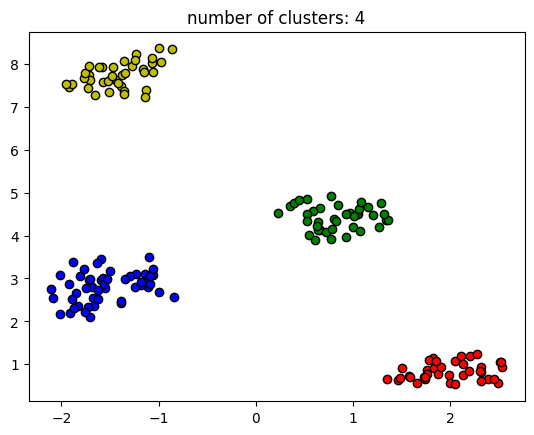

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Dataset

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

# Applying DBSCAN Clustering

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
       
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()



In [2]:
# Evaluation Metrics For DBSCAN Algorithm In Machine Learning 

sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31


                                                OPTICS Clustering - ML        

## OPTICS Clustering - ML

OPTICS (Ordering Points To Identify the Clustering Structure) is a density-based clustering algorithm similar to DBSCAN clustering. Unlike DBSCAN which struggles with varying densities. OPTICS does not directly assign clusters but instead creates a reachability plot which visually represents clusters. The key concepts in OPTICS are:

* **Core Distance:** The minimum distance needed for a point to be classified as a core point. If a point does not have enough nearby neighbours, its core distance is undefined.
* **Reachability Distance:** The distance at which a point can be reached from another point. It is calculated as the maximum of the core distance of the starting point and the actual distance between the points.

## Understanding Reachability Plot

A reachability plot is a graph that helps visualize clustering structures. It shows the reachability distance of each point in the dataset. It makes it ordered way based on how OPTICS processes them.

Here clusters appear as valleys in the plot where lower reachability distances indicate dense regions while peaks represent sparse regions or noise. To better understand the concept refer to the below image:

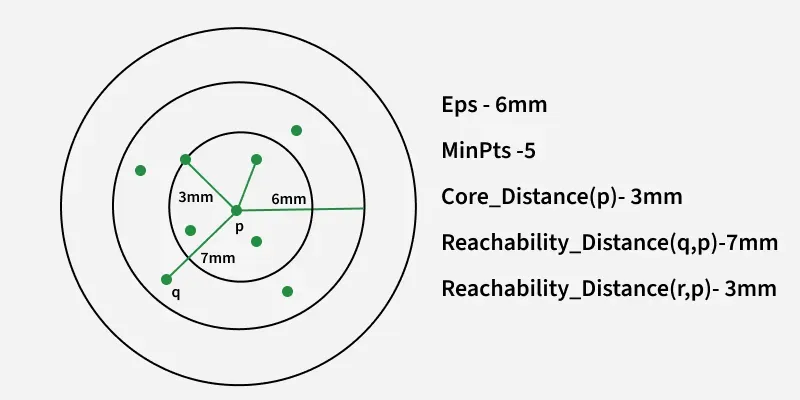

* Epsilon (Eps) = 6mm and MinPts = 5.
* **The core distance of point p is 3mm** meaning it needs at least 5 points within a 3mm radius to be considered as a core point.
* **The reachability distance from q to p is 7mm** (since q is farther than p's core distance).
* **The reachability distance from r to p is 3mm** (since r is within p's core distance).
* **It is more informative than DBSCAN** as the reachability plot provides better understanding of clustering structure. Now we will learn about its working.

## Working of OPTICS

* The algorithm selects a starting point and checks if it has at least MinPts neighbors within Eps.
* If the point meets the density requirement it is marked as a core point and nearby points are then analyzed.
* Reachability distance is computed for each neighboring point.
* Points are then processed in order of their reachability distance hence forming a reachability plot.
* Clusters appear as valleys i.e low reachability distances and noise appears as peaks i.e high reachability distances.

## Implementing OPTICS in Python

* OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05): Configures the OPTICS algorithm.
* labels=clustering.labels_: Retrieves cluster labels.
* plt.scatter(): Plots the clustering results.

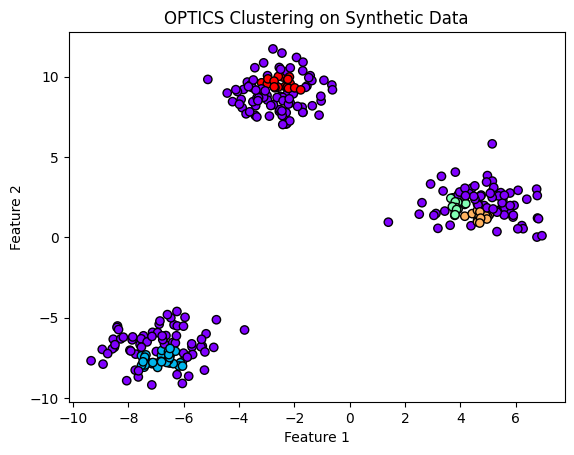

In [3]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

clustering = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clustering.fit(X)

labels = clustering.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolor='k')
plt.title("OPTICS Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Why we use OPTICS instead of DBSCAN?

* DBSCAN needs a fixed eps which may not work well if some clusters are tight and others are loose.
* OPTICS doesn’t force you to set a global distance. It gives a reachability plot and clusters can be extracted from it at different levels.
* OPTICS handles datasets with varying densities better and identify both dense and sparse clusters in one go.
* It provides more detailed cluster structure information making it easier to explore data visually and decide the best cut-off points for clusters.